# Banknote Authentication K-Means Clustering Analysis Project

In [156]:
# Load dataset
import pandas as pd

data = pd.read_csv('Banknote_authentication_dataset.csv')

data.shape

(1372, 2)

In [157]:
# Assign column V1 "Variance" as V1 and column V2 "Skewness" as V2
import numpy as np

V1 = data['V1']
V2 = data['V2']

data = [V1, V2]
data = np.array(data)

data

array([[  3.6216 ,   4.5459 ,   3.866  , ...,  -3.7503 ,  -3.5637 ,
         -2.5419 ],
       [  8.6661 ,   8.1674 ,  -2.6383 , ..., -13.4586 ,  -8.3827 ,
         -0.65804]])

In [158]:
# Generate descriptive stats
stats = {'stats': ['v1_mean', 'v1_std_dev', 'v1_min', 'v1_max', 'v2_mean', 'v2_std_dev', 'v2_min',
                                    'v2_max'], 'values': [V1.mean(), V1.std(), V1.min(), V1.max(), V2.mean(), V2.std(),
                                                         V2.min(), V2.max()]}
stats_df = pd.DataFrame(stats)

stats_df

,stats,values
0,v1_mean,0.433735
1,v1_std_dev,2.842763
2,v1_min,-7.042100
3,v1_max,6.824800
4,v2_mean,1.922353
5,v2_std_dev,5.869047
6,v2_min,-13.773100
7,v2_max,12.951600


In [6]:
# Structure data as column stack
data = np.column_stack((V1, V2))

In [121]:
# Fit K-Means algorithm to data and use .predict() method to assign data points to k=10 clusters
from sklearn.cluster import KMeans

km_result = KMeans(n_clusters = 10).fit(data)
km_result.predict(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([6, 6, 4, ..., 8, 0, 2], dtype=int32)

In [122]:
# Assign predictions to var
cluster_prediction = km_result.predict(data)

In [125]:
# Generate cluster centers for K=10 clusters
km_result.cluster_centers_
clusters = km_result.cluster_centers_

# Assign cluster center values to df
clusters_df = pd.DataFrame(clusters)

clusters_df.columns = ['Variance','Skewness']
clusters_df.insert(0, 'Cluster Index', [1,2,3,4,5,6,7,8,9,10], True)
clusters_df

,Cluster Index,Variance,Skewness
0,1,-2.257526,-6.913191
1,2,2.075218,6.134795
2,3,-1.042218,-0.400076
3,4,-5.644356,7.664560
4,5,2.924719,-4.019211
5,6,-1.637329,2.895068
6,7,3.772240,9.354146
7,8,3.049383,1.686358
8,9,-3.343822,-12.232022
9,10,-0.657716,9.991036


In [ ]:
# Compute WSS score for each cluster using .inertia_ method which measures the distance between each data point and its cluster center
# i.e. measures how well a dataset was clustered by K-Means
import sklearn.cluster as cluster

K=range(1,11)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data)
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

In [11]:
# Display WSS score for each cluster
wss_df = pd.DataFrame({'Cluster Index' : K, 'WSS' : wss})
wss_df

,Cluster Index,WSS
0,1,58304.529065
1,2,26944.127642
2,3,16619.817053
3,4,12797.369045
4,5,9955.357459
5,6,7620.370834
6,7,6717.618707
7,8,5665.751800
8,9,4835.992727
9,10,4119.591560


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Elbow Method')]

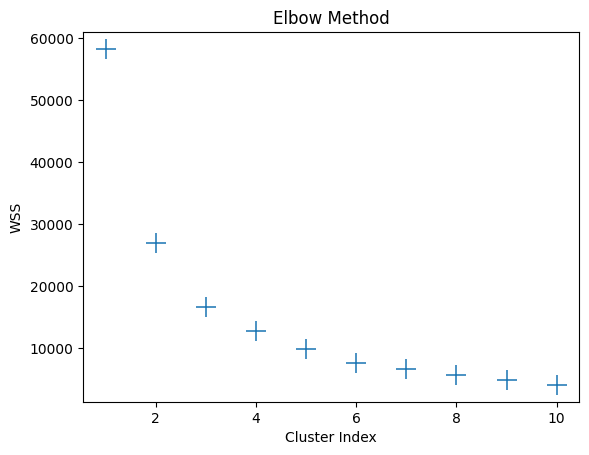

In [12]:
# Elbow method to determine optimal number of clusters - results show K=2 is optimal
import seaborn as sns
sns.scatterplot(x = 'Cluster Index', y = 'WSS', data = wss_df, marker = '+', s=200).set(title='Elbow Method')

## Performing exploritory data analysis and visualising data with K=2 clusters
#### K=2 clusters determined as the optimal number of clusters according to Elbow method

In [76]:
# Deploy K-Means algorithm with K=2 clusters
km_result_2c = KMeans(n_clusters = 2).fit(data)
km_result_2c.predict(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [77]:
# Assign predictions to var
cluster_prediction_2c = km_result_2c.predict(data)

In [89]:
# Generate cluster centers
km_result_2c.cluster_centers_
clusters_2c = km_result_2c.cluster_centers_

# Assign cluster center values to df
df_2c = pd.DataFrame(clusters_2c)

df_2c.columns = ['Variance','Skewness']
df_2c.insert(0, 'Cluster Index', [1,2], True)
df_2c

,Cluster Index,Variance,Skewness
0,1,0.869600,6.127179
1,2,-0.123767,-3.455913


In [132]:
# Cluster predictions for first 10 rows in data
var = pd.DataFrame(V1)
prediction_df_2c = var

prediction_df_2c.insert(loc=1,column='V2',value=V2)
prediction_df_2c.insert(loc=2,column='Prediction',value=cluster_prediction_2c)

prediction_df_2c.head(10)

,V1,V2,Prediction
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,1
3,3.45660,9.5228,0
4,0.32924,-4.4552,1
5,4.36840,9.6718,0
6,3.59120,3.0129,0
7,2.09220,-6.8100,1
8,3.20320,5.7588,0
9,1.53560,9.1772,0


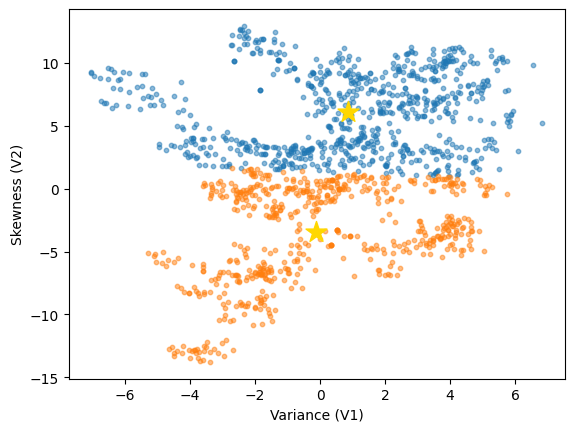

In [81]:
# Plot data for K=3 clusters. Data points are unlabelled as K-Means is a data clustering approach for unsupervised machine learning and
# the clusters are formed by groups of data with similar properties i.e. similar variance (V1) and skewness (V2)

plt.xlabel('Variance (V1)')
plt.ylabel('Skewness (V2)')

plt.scatter(data[km_result_2c.predict(data)==0,0],data[km_result_2c.predict(data)==0,1], s=10, alpha=0.5)
plt.scatter(data[km_result_2c.predict(data)==1,0],data[km_result_2c.predict(data)==1,1], s=10, alpha=0.5)

# Plot cluster centers denoted with *
plt.scatter(clusters_2c[0,0], clusters_2c[0,1], s=250, marker='*', color='gold')
plt.scatter(clusters_2c[1,0], clusters_2c[1,1], s=250, marker='*', color='gold')

## Performing exploritory data analysis and visualising data with K=7 clusters 
#### Experimenting with K=7 clusters to provide more detailed view on data segregation

In [142]:
# Deploy K-Means algorithm with K=7 clusters
km_result_7c = KMeans(n_clusters = 7).fit(data)
km_result_7c.predict(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 5, ..., 4, 4, 0], dtype=int32)

In [143]:
# Assign predictions to var
cluster_prediction_7c = km_result_7c.predict(data)

In [144]:
# Generate cluster centers
km_result_7c.cluster_centers_
clusters_7c = km_result_7c.cluster_centers_

# Assign cluster center values to df
df_7c = pd.DataFrame(clusters_7c)

df_7c.columns = ['Variance','Skewness']
df_7c.insert(0, 'Cluster Index', [1,2,3,4,5,6,7], True)
df_7c

,Cluster Index,Variance,Skewness
0,1,-1.028052,-0.349666
1,2,-1.574430,3.170116
2,3,2.603049,8.196720
3,4,2.861291,2.103218
4,5,-2.610946,-8.250749
5,6,2.683362,-4.039188
6,7,-3.378662,9.638066


In [155]:
# Cluster predictions for first 10 rows in data
var2 = pd.DataFrame(V1)
prediction_df_7c = var2

prediction_df_7c.insert(loc=1,column='V2',value=V2)
prediction_df_7c.insert(loc=2,column='Prediction',value=cluster_prediction_7c)

prediction_df_7c.head(10)

,V1,V2,Prediction
0,3.62160,8.6661,2
1,4.54590,8.1674,2
2,3.86600,-2.6383,5
3,3.45660,9.5228,2
4,0.32924,-4.4552,5
5,4.36840,9.6718,2
6,3.59120,3.0129,3
7,2.09220,-6.8100,5
8,3.20320,5.7588,2
9,1.53560,9.1772,2


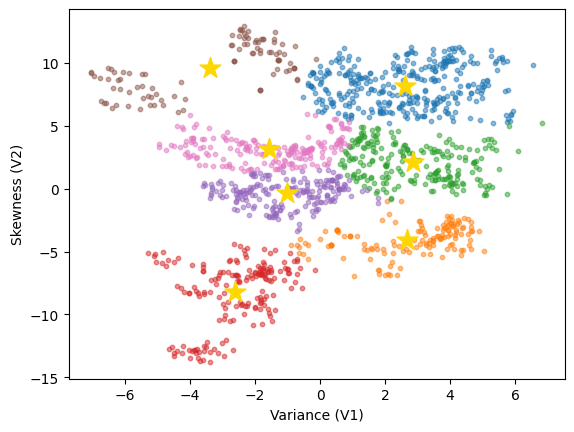

In [82]:
# Plot data for K=3 clusters. Data points are unlabelled as K-Means is a data clustering approach for unsupervised machine learning and
# the clusters are formed by groups of data with similar properties i.e. similar variance (V1) and skewness (V2)

import matplotlib.patches as mpatches

fig, ax = plt.subplots()

plt.xlabel('Variance (V1)')
plt.ylabel('Skewness (V2)')

plt.scatter(data[km_result_7c.predict(data)==0,0],data[km_result_7c.predict(data)==0,1], s=10, alpha=0.5)
plt.scatter(data[km_result_7c.predict(data)==1,0],data[km_result_7c.predict(data)==1,1], s=10, alpha=0.5)
plt.scatter(data[km_result_7c.predict(data)==2,0],data[km_result_7c.predict(data)==2,1], s=10, alpha=0.5)
plt.scatter(data[km_result_7c.predict(data)==3,0],data[km_result_7c.predict(data)==3,1], s=10, alpha=0.5)
plt.scatter(data[km_result_7c.predict(data)==4,0],data[km_result_7c.predict(data)==4,1], s=10, alpha=0.5)
plt.scatter(data[km_result_7c.predict(data)==5,0],data[km_result_7c.predict(data)==5,1], s=10, alpha=0.5)
plt.scatter(data[km_result_7c.predict(data)==6,0],data[km_result_7c.predict(data)==6,1], s=10, alpha=0.5)


plt.scatter(clusters_7c[0,0], clusters_7c[0,1], s=250, marker='*', color='gold')
plt.scatter(clusters_7c[1,0], clusters_7c[1,1], s=250, marker='*', color='gold')
plt.scatter(clusters_7c[2,0], clusters_7c[2,1], s=250, marker='*', color='gold')
plt.scatter(clusters_7c[3,0], clusters_7c[3,1], s=250, marker='*', color='gold')
plt.scatter(clusters_7c[4,0], clusters_7c[4,1], s=250, marker='*', color='gold')
plt.scatter(clusters_7c[5,0], clusters_7c[5,1], s=250, marker='*', color='gold')
plt.scatter(clusters_7c[6,0], clusters_7c[6,1], s=250, marker='*', color='gold')